# Working with Data Part 1

# Reading and Writing Text Files

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
dframe=pd.read_csv('lec25.csv') ###it takes first row as column naames 

In [4]:
dframe

,q,e,s,t,apple
0,2,3,4,5,pear
1,a,s,d,f,rabbit
2,5,2,5,7,dog


In [5]:
dframe=pd.read_csv('lec25.csv', header=None) ##skip column names

In [6]:
dframe

,0,1,2,3,4
0,q,e,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [7]:
dframe=pd.read_table('lec25.csv', sep=',', header=None) ##read table command

In [8]:
dframe

,0,1,2,3,4
0,q,e,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [10]:
pd.read_csv('lec25.csv', header=None, nrows=2) ##first two rows

,0,1,2,3,4
0,q,e,s,t,apple
1,2,3,4,5,pear


In [11]:
###export to csv csv

dframe.to_csv('mytextdata_out.csv')

In [12]:
import sys

In [13]:
###in order to see how does ti look like before you save it
dframe.to_csv(sys.stdout)

,0,1,2,3,4
0,q,e,s,t,apple
1,2,3,4,5,pear
2,a,s,d,f,rabbit
3,5,2,5,7,dog


In [14]:
dframe.to_csv(sys.stdout, sep='_')

_0_1_2_3_4
0_q_e_s_t_apple
1_2_3_4_5_pear
2_a_s_d_f_rabbit
3_5_2_5_7_dog


In [17]:
###specific columns

dframe.to_csv(sys.stdout, columns=[0,1,2])

,0,1,2
0,q,e,s
1,2,3,4
2,a,s,d
3,5,2,5


# JSON with Python

In [18]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [22]:
# Heres an example of what a JSON (JavaScript Object Notation) looks like:
json_obj = """
{   "zoo_animal": "Lion",
    "food": ["Meat", "Veggies", "Honey"],
    "fur": "Golden",
    "clothes": null, 
    "diet": [{"zoo_animal": "Gazelle", "food":"grass", "fur": "Brown"}]
}
"""

In [23]:
#Let import json module
import json

#Lets load json data
data = json.loads(json_obj)


In [24]:
import json

In [26]:
data=json.loads(json_obj)  ###read from json

In [27]:
data

{u'clothes': None,
 u'diet': [{u'food': u'grass', u'fur': u'Brown', u'zoo_animal': u'Gazelle'}],
 u'food': [u'Meat', u'Veggies', u'Honey'],
 u'fur': u'Golden',
 u'zoo_animal': u'Lion'}

In [28]:
json.dumps(data) ###convert it to json again

'{"food": ["Meat", "Veggies", "Honey"], "zoo_animal": "Lion", "fur": "Golden", "diet": [{"food": "grass", "zoo_animal": "Gazelle", "fur": "Brown"}], "clothes": null}'

In [29]:
dframe=DataFrame(data['diet'])

In [30]:
dframe

,food,fur,zoo_animal
0,grass,Brown,Gazelle


In [33]:
dframe=DataFrame(data['food'])

In [34]:
dframe

,0
0,Meat
1,Veggies
2,Honey


# HTML with Python

In [1]:

from pandas import read_html
import pandas as pd
from pandas import Series, DataFrame

from pandas import read_html



In [4]:
#Lets grab a url for list of failed banks
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'

In [5]:
"""
IMPORTANT NOTE: NEED TO HAVE beautiful-soup INSTALLED as well as html5lib !!!!

"""

'\nIMPORTANT NOTE: NEED TO HAVE beautiful-soup INSTALLED as well as html5lib !!!!\n\n'

In [6]:
# Grab data from html and put it intop a list of DataFrame objects!
dframe_list = pd.io.html.read_html(url)

AttributeError: 'module' object has no attribute '_base'

# Excel files

In [7]:
import pandas as pd

In [8]:
xlsfile=pd.ExcelFile('lec_28_test.xlsx')

In [10]:
dframe=xlsfile.parse('Sheet1') ##this is how to import xls

In [12]:
dframe

,This is a test,Unnamed: 1,Unnamed: 2
0,56,5,5
1,6,4,4
2,3,3,2
3,1,2,3


# Merge

In [13]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [14]:
# Let's make a dframe

dframe1 = DataFrame({'key':['X','Z','Y','Z','X','X'],'data_set_1': np.arange(6)})


In [15]:
#Show
dframe1

,data_set_1,key
0,0,X
1,1,Z
2,2,Y
3,3,Z
4,4,X
5,5,X


In [16]:
#Now lets make another dframe

dframe2 = DataFrame({'key':['Q','Y','Z'],'data_set_2':[1,2,3]})

#Show
dframe2

,data_set_2,key
0,1,Q
1,2,Y
2,3,Z


In [17]:
# Now we can use merge the dataframes, this is a "many-to-one" situation

# Merge will automatically choose overlapping columns to merge on 
##It chose to be on the common column
pd.merge(dframe1,dframe2)

#Note no overlapping 'X's

,data_set_1,key,data_set_2
0,1,Z,3
1,3,Z,3
2,2,Y,2


In [18]:
##match on a specific column

pd.merge(dframe1,dframe2, on='key')

,data_set_1,key,data_set_2
0,1,Z,3
1,3,Z,3
2,2,Y,2


In [19]:
pd.merge(dframe1,dframe2, on='key', how='left') ##left join

,data_set_1,key,data_set_2
0,0,X,NaN
1,1,Z,3.0
2,2,Y,2.0
3,3,Z,3.0
4,4,X,NaN
5,5,X,NaN


In [20]:
# Choosing the one on the right (dframe2)  
pd.merge(dframe1,dframe2,on='key',how='right') ##right join


,data_set_1,key,data_set_2
0,1.0,Z,3
1,3.0,Z,3
2,2.0,Y,2
3,NaN,Q,1


In [22]:
#Choosing the "outer" method selects the union of both keys
pd.merge(dframe1,dframe2,on='key',how='outer')

,data_set_1,key,data_set_2
0,0.0,X,NaN
1,4.0,X,NaN
2,5.0,X,NaN
3,1.0,Z,3.0
4,3.0,Z,3.0
5,2.0,Y,2.0
6,NaN,Q,1.0


In [23]:
#Now we'll learn about a many to many merge

# Nnote that these DataFrames contain more than one instance of the key in BOTH datasets

dframe3 = DataFrame({'key': ['X', 'X', 'X', 'Y', 'Z', 'Z'],
                 'data_set_3': range(6)})
dframe4 = DataFrame({'key': ['Y', 'Y', 'X', 'X', 'Z'],
                 'data_set_4': range(5)})

#Show the merge
pd.merge(dframe3, dframe4)

,data_set_3,key,data_set_4
0,0,X,2
1,0,X,3
2,1,X,2
3,1,X,3
4,2,X,2
5,2,X,3
6,3,Y,0
7,3,Y,1
8,4,Z,4
9,5,Z,4


In [24]:
##So what happened? A many to many merge results in the product of the rows. 
###Because there were 3 'X's in dframe3 and 2 'X's in dframe4 there ended up being a total of 6 'X' rows in the result (2*3=6)! 
###Note how dframe3 repeats its 0,1,2 values for 'X' and dframe4 repeats its '2,3' pairs throughout the key set.

In [25]:
# We can also merge with multiple keys!

# Dframe on left
df_left = DataFrame({'key1': ['SF', 'SF', 'LA'],
                  'key2': ['one', 'two', 'one'],
                  'left_data': [10,20,30]})

#Dframe on right
df_right = DataFrame({'key1': ['SF', 'SF', 'LA', 'LA'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'right_data': [40,50,60,70]})

#Merge
pd.merge(df_left, df_right, on=['key1', 'key2'], how='outer')

,key1,key2,left_data,right_data
0,SF,one,10.0,40.0
1,SF,one,10.0,50.0
2,SF,two,20.0,NaN
3,LA,one,30.0,60.0
4,LA,two,NaN,70.0


In [26]:
## Now using the above you can check mulitple data sets for multiple key combos, 
##for instance what did the left data set have for LA,one?
# Answer =  60

In [27]:
#Note that the left and right DataFrames have overlapping key names (key1 and key2).
# pandas automatically adds suffixes to them

pd.merge(df_left,df_right,on='key1')

,key1,key2_x,left_data,key2_y,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [28]:
# We can also specify what the suffix becomes
pd.merge(df_left,df_right, on='key1',suffixes=('_lefty','_righty'))

,key1,key2_lefty,left_data,key2_righty,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [29]:
# For more info on merge parameters check out:
url = 'http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html'

# Next we'll learn how to merge on Index!

In [30]:
pd.merge(dframe1, dframe2, left_on='key', right_on='key')

,data_set_1,key,data_set_2
0,1,Z,3
1,3,Z,3
2,2,Y,2


In [31]:
pd.merge(dframe1, dframe2, left_on='data_set_1', right_on='data_set_2')

,data_set_1,key_x,data_set_2,key_y
0,1,Z,1,Q
1,2,Y,2,Y
2,3,Z,3,Z


In [32]:
'''
In [62]: result = pd.merge(left, right, left_on='key', right_index=True,
   ....:                   how='left', sort=False);
   ....: 
   
   '''

"\nresult = pd.merge(left, right, left_on='key', right_index=True,\n                  how='left', sort=False);\n\n   \n   "

# Working with Data: Part 2

# Merge on Index

In [35]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [36]:
# Lets get two dframes

df_left = DataFrame({'key': ['X','Y','Z','X','Y'],
                  'data': range(5)})
df_right = DataFrame({'group_data': [10, 20]}, index=['X', 'Y'])


In [37]:
#Show
df_left

,data,key
0,0,X
1,1,Y
2,2,Z
3,3,X
4,4,Y


In [38]:
#Show
df_right

,group_data
X,10
Y,20


In [39]:
#Now merge, we'll use the key for the left Dframe, and the index for the right
pd.merge(df_left,df_right,left_on='key',right_index=True)


,data,key,group_data
0,0,X,10
3,3,X,10
1,1,Y,20
4,4,Y,20


In [40]:
# We can also get a union by using outer
pd.merge(df_left,df_right,left_on='key',right_index=True,how='outer')

,data,key,group_data
0,0,X,10.0
3,3,X,10.0
1,1,Y,20.0
4,4,Y,20.0
2,2,Z,NaN


In [41]:
# We can also get a left join
pd.merge(df_left,df_right,left_on='key',right_index=True,how='left')

,data,key,group_data
0,0,X,10.0
1,1,Y,20.0
2,2,Z,NaN
3,3,X,10.0
4,4,Y,20.0


In [42]:
# We can also get a right join
pd.merge(df_left,df_right,left_on='key',right_index=True,how='right')

,data,key,group_data
0,0,X,10
3,3,X,10
1,1,Y,20
4,4,Y,20


In [43]:
#Now let's try something a little more complicated, remember hierarchal index?
df_left_hr = DataFrame({'key1': ['SF','SF','SF','LA','LA'],
                   'key2': [10, 20, 30, 20, 30],
                   'data_set': np.arange(5.)})
df_right_hr = DataFrame(np.arange(10).reshape((5, 2)),
                   index=[['LA','LA','SF','SF','SF'],
                          [20, 10, 10, 10, 20]],
                   columns=['col_1', 'col_2'])

In [44]:
#SHOW
df_left_hr

,data_set,key1,key2
0,0.0,SF,10
1,1.0,SF,20
2,2.0,SF,30
3,3.0,LA,20
4,4.0,LA,30


In [45]:
#Show, this has a index hierarchy
df_right_hr

col_1  col_2
LA 20      0      1
   10      2      3
SF 10      4      5
   10      6      7
   20      8      9

In [46]:
# Now we can merge the left by using keys and the right by its index
pd.merge(df_left_hr,df_right_hr,left_on=['key1','key2'],right_index=True)

,data_set,key1,key2,col_1,col_2
0,0.0,SF,10,4,5
0,0.0,SF,10,6,7
1,1.0,SF,20,8,9
3,3.0,LA,20,0,1


In [47]:
# We can alo keep a union by choosing 'outer' method
pd.merge(df_left_hr,df_right_hr,left_on=['key1','key2'],right_index=True,how='outer')

,data_set,key1,key2,col_1,col_2
0,0.0,SF,10.0,4.0,5.0
0,0.0,SF,10.0,6.0,7.0
1,1.0,SF,20.0,8.0,9.0
2,2.0,SF,30.0,NaN,NaN
3,3.0,LA,20.0,0.0,1.0
4,4.0,LA,30.0,NaN,NaN
4,NaN,LA,10.0,2.0,3.0


In [48]:
# WE can also you .join()

# Shown on our first two DataFrames
df_left.join(df_right)

,data,key,group_data
0,0,X,NaN
1,1,Y,NaN
2,2,Z,NaN
3,3,X,NaN
4,4,Y,NaN


In [49]:
df_left

,data,key
0,0,X
1,1,Y
2,2,Z
3,3,X
4,4,Y


In [50]:
df_right

,group_data
X,10
Y,20


# Concatenate

In [51]:
# Now we'll learn about concatenating along an axis
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [52]:
# First in just Numpy

# Create a matrix 
arr1 = np.arange(9).reshape((3,3))

In [53]:
# Show
arr1


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [54]:
# Concatenate along axis 1
np.concatenate([arr1,arr1],axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [55]:
# Let's see other axis options
np.concatenate([arr1,arr1],axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [56]:
# Now let's see how this works in pandas

In [57]:
# Lets create two Series with no overlap
ser1 =  Series([0,1,2],index=['T','U','V'])

ser2 = Series([3,4],index=['X','Y'])

#Now let use concat (default is axis=0)
pd.concat([ser1,ser2])

T    0
U    1
V    2
X    3
Y    4
dtype: int64

In [58]:
ser1

T    0
U    1
V    2
dtype: int64

In [59]:
ser2

X    3
Y    4
dtype: int64

In [60]:
# Now passing along another axis will produce a DataFrame
pd.concat([ser1,ser2],axis=1)

,0,1
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
X,NaN,3.0
Y,NaN,4.0


In [61]:
# We can specify which specific axes to be used
pd.concat([ser1,ser2],axis=1,join_axes=[['U','V','Y']])

,0,1
U,1.0,NaN
V,2.0,NaN
Y,NaN,4.0


In [62]:
# Lets say we wanted to add markers.keys to the concatenation result

# WE can do this with a hierarchical index
pd.concat([ser1,ser2],keys=['cat1','cat2'])

cat1  T    0
      U    1
      V    2
cat2  X    3
      Y    4
dtype: int64

In [63]:
# Along the axis=1 then these Keys become column headers
pd.concat([ser1,ser2],axis=1,keys=['cat1','cat2'])

,cat1,cat2
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
X,NaN,3.0
Y,NaN,4.0


In [64]:
#Lastly, everything works similarly in DataFrames

dframe1 = DataFrame(np.random.randn(4,3), columns=['X', 'Y', 'Z'])
dframe2 = DataFrame(np.random.randn(3, 3), columns=['Y', 'Q', 'X'])

In [66]:
dframe1

,X,Y,Z
0,-0.827705,0.833153,-1.593337
1,-0.539423,0.545040,0.111294
2,0.945585,-1.826128,-0.255668
3,1.427217,0.537061,-1.159972


In [67]:
dframe2

,Y,Q,X
0,1.134254,-2.579119,0.183804
1,-0.708028,0.660618,0.940407
2,-0.796580,-0.344931,1.247847


In [68]:
#Concat on DataFrame
pd.concat([dframe1,dframe2])

,Q,X,Y,Z
0,NaN,-0.827705,0.833153,-1.593337
1,NaN,-0.539423,0.545040,0.111294
2,NaN,0.945585,-1.826128,-0.255668
3,NaN,1.427217,0.537061,-1.159972
0,-2.579119,0.183804,1.134254,NaN
1,0.660618,0.940407,-0.708028,NaN
2,-0.344931,1.247847,-0.796580,NaN


In [69]:
#If we dont care about the index info and just want to make a complete DataFrame, just use ignore_index
pd.concat([dframe1,dframe2],ignore_index=True)

,Q,X,Y,Z
0,NaN,-0.827705,0.833153,-1.593337
1,NaN,-0.539423,0.545040,0.111294
2,NaN,0.945585,-1.826128,-0.255668
3,NaN,1.427217,0.537061,-1.159972
4,-2.579119,0.183804,1.134254,NaN
5,0.660618,0.940407,-0.708028,NaN
6,-0.344931,1.247847,-0.796580,NaN


In [70]:
#For more info in documentation:
url='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html'

# Combining Data Frames

In [71]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [72]:
#Lets make some Series to work with

#First Series
ser1 = Series([2,np.nan,4,np.nan,6,np.nan],
           index=['Q','R','S','T','U','V'])

#Second Series (based off length of ser1)
ser2 = Series(np.arange(len(ser1), dtype=np.float64),
           index=['Q','R','S','T','U','V'])

ser2[-1] = np.nan

In [73]:
ser1

Q    2.0
R    NaN
S    4.0
T    NaN
U    6.0
V    NaN
dtype: float64

In [74]:
ser2

Q    0.0
R    1.0
S    2.0
T    3.0
U    4.0
V    NaN
dtype: float64

In [75]:
# Now let's get a series where the value of ser1 is chosen if ser2 is NAN,otherwise let the value be ser1
Series(np.where(pd.isnull(ser1),ser2,ser1),index=ser1.index)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    NaN
dtype: float64

In [76]:
#Take a moment to really understand how the above worked

#Now we can do the same thing simply by using combine_first with pandas
ser1.combine_first(ser2)

#This combines the Series values, choosing the values of the calling Series first, unless its a NAN

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    NaN
dtype: float64

In [77]:
#Now lets how this works on a DataFrame!

#Lets make some 
dframe_odds = DataFrame({'X': [1., np.nan, 3., np.nan],
                     'Y': [np.nan, 5., np.nan, 7.],
                     'Z': [np.nan, 9., np.nan, 11.]})
dframe_evens = DataFrame({'X': [2., 4., np.nan, 6., 8.],
                     'Y': [np.nan, 10., 12., 14., 16.]})

In [78]:
#Show
dframe_odds

,X,Y,Z
0,1.0,NaN,NaN
1,NaN,5.0,9.0
2,3.0,NaN,NaN
3,NaN,7.0,11.0


In [79]:
#Show
dframe_evens

,X,Y
0,2.0,NaN
1,4.0,10.0
2,NaN,12.0
3,6.0,14.0
4,8.0,16.0


In [80]:
#Now lets combine using odds values first, unless theres a NAN, then put the evens values
dframe_odds.combine_first(dframe_evens)

,X,Y,Z
0,1.0,NaN,NaN
1,4.0,5.0,9.0
2,3.0,12.0,NaN
3,6.0,7.0,11.0
4,8.0,16.0,NaN


# Reshaping

In [81]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [82]:
#Let's see how stack and unstack work

# Create DataFrame
dframe1 = DataFrame(np.arange(8).reshape((2, 4)),
                 index=pd.Index(['LA', 'SF'], name='city'),
                 columns=pd.Index(['A', 'B', 'C','D'], name='letter'))
#Show
dframe1

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [83]:
# Use stack to pivot the columns into the rows
dframe_st = dframe1.stack()

#Show
dframe_st

city  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int32

In [84]:
#We can always rearrange back into a DataFrame
dframe_st.unstack()

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [85]:
#We can choose which level to unstack by
dframe_st.unstack(0)

city,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


In [86]:
# Also by which name to unstack by
dframe_st.unstack('letter')

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [87]:
# Also by which name to unstack by
dframe_st.unstack('city')

city,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


In [88]:
# Let's see how stack and unstack handle NAN

#Make two series
ser1 = Series([0, 1, 2], index=['Q', 'X', 'Y'])
ser2 = Series([4, 5, 6], index=['X', 'Y', 'Z'])

#Concat to make a dframe
dframe = pd.concat([ser1, ser2], keys=['Alpha', 'Beta'])

# Unstack resulting DataFrame
dframe.unstack()

,Q,X,Y,Z
Alpha,0.0,1.0,2.0,NaN
Beta,NaN,4.0,5.0,6.0


In [89]:
# Now stack will filter out NAN by default
dframe.unstack().stack()

Alpha  Q    0.0
       X    1.0
       Y    2.0
Beta   X    4.0
       Y    5.0
       Z    6.0
dtype: float64

In [90]:
# IF we dont want this we can set it to False
dframe.unstack().stack(dropna=False)

Alpha  Q    0.0
       X    1.0
       Y    2.0
       Z    NaN
Beta   Q    NaN
       X    4.0
       Y    5.0
       Z    6.0
dtype: float64

# Pivoting

In [91]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [92]:
# Lets create some data to play with:

# Note: It is not necessary to understand how this dataset was made to understand this Lecture.

#import pandas testing utility
import pandas.util.testing as tm; tm.N = 3

#Create a unpivoted function
def unpivot(frame):
    N, K = frame.shape
    
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    
    # Return the DataFrame
    return DataFrame(data, columns=['date', 'variable', 'value'])

#Set the DataFrame we'll be using
dframe = unpivot(tm.makeTimeDataFrame())

In [93]:
#Show the "stacked" data, note how there are multiple variables and values for the dates
dframe

,date,variable,value
0,2000-01-03,A,0.276880
1,2000-01-04,A,-0.756248
2,2000-01-05,A,0.306404
3,2000-01-03,B,0.098369
4,2000-01-04,B,-1.381873
5,2000-01-05,B,0.975731
6,2000-01-03,C,-0.296771
7,2000-01-04,C,-2.152204
8,2000-01-05,C,0.280448
9,2000-01-03,D,1.138998


In [94]:
# Now let's pivot the data

# First two value spassed are teh row and column indexes, then finally an optional fill value
dframe_piv = dframe.pivot('date','variable','value')

#Show
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,0.276880,0.098369,-0.296771,1.138998
2000-01-04,-0.756248,-1.381873,-2.152204,-0.002478
2000-01-05,0.306404,0.975731,0.280448,-0.778630


# Duplicates in DataFrames

In [95]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [96]:
#Lets get a dataframe with duplicates

dframe = DataFrame({'key1': ['A'] * 2 + ['B'] * 3,
                  'key2': [2, 2, 2, 3, 3]})

#Show
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [97]:
#We can use duplicated to find duplicates
dframe.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [98]:
# We can also drop duplicates like this:
dframe.drop_duplicates()

,key1,key2
0,A,2
2,B,2
3,B,3


In [99]:
#You can filter which duplicates to drop by a single column
dframe.drop_duplicates(['key1'])

,key1,key2
0,A,2
2,B,2


In [100]:
#Show original
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [106]:
#By default the first value was taken for the duplicates, we can also take the last value instead
dframe.drop_duplicates(['key1'], keep='last')

,key1,key2
1,A,2
4,B,3


# Mapping

In [107]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [108]:
# Let's create a dframe to work with (Highest elevation cities in USA)
dframe = DataFrame({'city':['Alma','Brian Head','Fox Park'],
                    'altitude':[3158,3000,2762]})

#Show
dframe

,altitude,city
0,3158,Alma
1,3000,Brian Head
2,2762,Fox Park


In [109]:
#Now let's say we wanted to add a column for the States, we can do that with a mapping.
state_map={'Alma':'Colorado','Brian Head':'Utah','Fox Park':'Wyoming'}

In [110]:
# Now we can map that data to our current dframe
dframe['state'] = dframe['city'].map(state_map)

In [111]:
#Show result
dframe

,altitude,city,state
0,3158,Alma,Colorado
1,3000,Brian Head,Utah
2,2762,Fox Park,Wyoming


In [112]:
# Mapping is a great way to do element-wise transfomations and other data cleaning operations!

# Replace

In [113]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

In [114]:
# Lets make  Series
ser1 = Series([1,2,3,4,1,2,3,4])
#Show
ser1

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

In [115]:
# Using replace we can select --> .replace(value to be replaced, new_value)
ser1.replace(1,np.nan)

0    NaN
1    2.0
2    3.0
3    4.0
4    NaN
5    2.0
6    3.0
7    4.0
dtype: float64

In [116]:
#Can also input lists
ser1.replace([1,4],[100,400])

0    100
1      2
2      3
3    400
4    100
5      2
6      3
7    400
dtype: int64

In [117]:
#Can also input dictionary
ser1.replace({4:np.nan})

0    1.0
1    2.0
2    3.0
3    NaN
4    1.0
5    2.0
6    3.0
7    NaN
dtype: float64

# Rename Index

In [118]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [119]:
# Making a DataFrame
dframe= DataFrame(np.arange(12).reshape((3, 4)),
                 index=['NY', 'LA', 'SF'],
                 columns=['A', 'B', 'C', 'D'])

#Show
dframe

,A,B,C,D
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [120]:
# Just like a Series, axis indexes can also use map

#Let's use map to lowercase the city initials
dframe.index.map(str.lower)

array(['ny', 'la', 'sf'], dtype=object)

In [121]:
# If you want to assign this to the actual index, you can use index
dframe.index = dframe.index.map(str.lower)
#Show
dframe

,A,B,C,D
ny,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [122]:
# Use rename if you want to create a transformed version withour modifying the original!

#str.title will capitalize the first letter, lowercasing the columns
dframe.rename(index=str.title, columns=str.lower)

,a,b,c,d
Ny,0,1,2,3
La,4,5,6,7
Sf,8,9,10,11


In [123]:
# We can also use rename to insert dictionaries providing new values for indexes or columns!
dframe.rename(index={'ny': 'NEW YORK'},
            columns={'A': 'ALPHA'})

,ALPHA,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [124]:
# If you would like to actually edit the data set in place, set inplace=True
dframe.rename(index={'ny': 'NEW YORK'}, inplace=True)
dframe

,A,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


# Binning

In [125]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [126]:
#Now we'll learn about binning

years = [1990,1991,1992,2008,2012,2015,1987,1969,2013,2008,1999]

# We can seperate these years by decade
decade_bins = [1960,1970,1980,1990,2000,2010,2020]

#Now we'll use cut to get somethign called a Category object
decade_cat = pd.cut(years,decade_bins)

In [127]:
#Show
decade_cat

[(1980, 1990], (1990, 2000], (1990, 2000], (2000, 2010], (2010, 2020], ..., (1980, 1990], (1960, 1970], (2010, 2020], (2000, 2010], (1990, 2000]]
Length: 11
Categories (6, object): [(1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [128]:
# We can check the categories using .categories
decade_cat.categories

Index([u'(1960, 1970]', u'(1970, 1980]', u'(1980, 1990]', u'(1990, 2000]',
       u'(2000, 2010]', u'(2010, 2020]'],
      dtype='object')

In [129]:
# Then we can check the value counts in each category
pd.value_counts(decade_cat)

(2010, 2020]    3
(1990, 2000]    3
(2000, 2010]    2
(1980, 1990]    2
(1960, 1970]    1
(1970, 1980]    0
dtype: int64

In [130]:
# We can also pass data values to the cut.

#For instance, if we just wanted to make two bins, evenly spaced based on max and min year, with a 1 year precision
pd.cut(years,2,precision=1)

[(1969, 1992], (1969, 1992], (1969, 1992], (1992, 2015], (1992, 2015], ..., (1969, 1992], (1969, 1992], (1992, 2015], (1992, 2015], (1992, 2015]]
Length: 11
Categories (2, object): [(1969, 1992] < (1992, 2015]]

# Outliers

In [160]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [161]:
# Let's see how we would find outliers in a dataset

# First we'll seed the numpy generator
np.random.seed(12345)

#Next we'll create the dataframe
dframe = DataFrame(np.random.randn(1000,4))

In [162]:
#Show preview
dframe.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [163]:
# Lets describe the data
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [164]:
# Lets select the first column
col = dframe[0]

In [165]:
# NOw we can check which values in the column are greater than 3, for instance.
col[np.abs(col)>3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [166]:
# So we now know in column[0], rows 523 and 900 have values with abs > 3

#How about all the columns?

# We can use the "any" method
dframe[(np.abs(dframe)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [167]:
# WE could also possibly cap the data at 3

dframe[np.abs(dframe)>3] = np.sign(dframe) *3

In [168]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


# Permutation

In [169]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [170]:
# WE can randomly reorder (permutate) a Series, or the rows in a DataFrame

#Let's take a look
dframe = DataFrame(np.arange(4 * 4).reshape((4, 4)))

#Create an array with a random perumation of 0,1,2,3
blender = np.random.permutation(4)

blender

array([1, 3, 2, 0])

In [171]:
dframe

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [172]:
# Now permutate the dframe based on the blender
dframe.take(blender)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3


In [173]:
# Now what if we want permuations WITH replacement

# Let imagine a box with 3 marbles in it: labeled 1, 2, and 3
box = np.array([1,2,3])

# Now lets create a random permuation WITH replacement using randint
shaker = np.random.randint(0, len(box), size=10)

# Let's check teh box "shaker"
shaker

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

In [174]:
#Now lets grab form the box
hand_grabs = box.take(shaker)

#show
hand_grabs

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 3])

# Working with Data Part 3

# Group by on Data Frames

In [175]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [176]:
#Let's make a dframe
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                    'k2':['alpha','beta','alpha','beta','alpha'],
                    'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5)})

#Show
dframe

,dataset1,dataset2,k1,k2
0,0.779515,0.159703,X,alpha
1,-2.453088,0.101103,X,beta
2,0.689468,-0.087746,Y,alpha
3,0.280517,-0.658604,Y,beta
4,1.622469,0.497419,Z,alpha


In [177]:
#Now let's see how to use groupby

#Lets grab the dataset1 column and group it by the k1 key
group1 = dframe['dataset1'].groupby(dframe['k1'])

#Show the groupby object
group1

In [178]:
#Now we can perform operations on this particular group
group1.mean()

k1
X   -0.836786
Y    0.484992
Z    1.622469
Name: dataset1, dtype: float64

In [179]:
# We can use group keys that are series as well

#For example:

#We'll make some arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
dframe['dataset1'].groupby([cities,month]).mean()

LA  FEB   -2.453088
    JAN    0.689468
NY  FEB    0.280517
    JAN    1.200992
Name: dataset1, dtype: float64

In [180]:
# let's see the original dframe again.
dframe

,dataset1,dataset2,k1,k2
0,0.779515,0.159703,X,alpha
1,-2.453088,0.101103,X,beta
2,0.689468,-0.087746,Y,alpha
3,0.280517,-0.658604,Y,beta
4,1.622469,0.497419,Z,alpha


In [181]:
# WE can also pass column names as group keys
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.836786,0.130403
Y,0.484992,-0.373175
Z,1.622469,0.497419


In [182]:
# Or multiple column names
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.779515  0.159703
   beta  -2.453088  0.101103
Y  alpha  0.689468 -0.087746
   beta   0.280517 -0.658604
Z  alpha  1.622469  0.497419

In [183]:
# Another useful groupby method is getting the group sizes
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [184]:
# We can also iterate over groups

#For example:
for name,group in dframe.groupby('k1'):
    print "This is the %s group" %name
    print group
    print '\n'

This is the X group
   dataset1  dataset2 k1     k2
0  0.779515  0.159703  X  alpha
1 -2.453088  0.101103  X   beta


This is the Y group
   dataset1  dataset2 k1     k2
2  0.689468 -0.087746  Y  alpha
3  0.280517 -0.658604  Y   beta


This is the Z group
   dataset1  dataset2 k1     k2
4  1.622469  0.497419  Z  alpha




In [185]:
# We can also iterate with multiple keys
for (k1,k2) , group in dframe.groupby(['k1','k2']):
    print "Key1 = %s Key2 = %s" %(k1,k2)
    print group
    print '\n'

Key1 = X Key2 = alpha
   dataset1  dataset2 k1     k2
0  0.779515  0.159703  X  alpha


Key1 = X Key2 = beta
   dataset1  dataset2 k1    k2
1 -2.453088  0.101103  X  beta


Key1 = Y Key2 = alpha
   dataset1  dataset2 k1     k2
2  0.689468 -0.087746  Y  alpha


Key1 = Y Key2 = beta
   dataset1  dataset2 k1    k2
3  0.280517 -0.658604  Y  beta


Key1 = Z Key2 = alpha
   dataset1  dataset2 k1     k2
4  1.622469  0.497419  Z  alpha




In [186]:
# A possibly useful tactic is creating a dictionary of the data pieces 
group_dict = dict(list(dframe.groupby('k1')))

#Show the group with X
group_dict['X']

,dataset1,dataset2,k1,k2
0,0.779515,0.159703,X,alpha
1,-2.453088,0.101103,X,beta


In [187]:
# We could have also chosen to do this with axis = 1

# Let's creat a dictionary for dtypes of objects!
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))

#show
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.779515  0.159703
 1 -2.453088  0.101103
 2  0.689468 -0.087746
 3  0.280517 -0.658604
 4  1.622469  0.497419, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [188]:
# Next we'll learn how to use groupby with columns

# For example if we only wanted to group the dataset2 column with both sets of keys
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]

dataset2_group.mean()

dataset2
k1 k2             
X  alpha  0.159703
   beta   0.101103
Y  alpha -0.087746
   beta  -0.658604
Z  alpha  0.497419

# Group by on Dict and Series

In [189]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#let's learn how to use dict or series with groupby

In [190]:
# Let's make a Dframe

animals = DataFrame(np.arange(16).reshape(4, 4),
                   columns=['W', 'X', 'Y', 'Z'],
                   index=['Dog', 'Cat', 'Bird', 'Mouse'])

#Now lets add some NAN values
animals.ix[1:2, ['W', 'Y']] = np.nan 

#Show
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [198]:
##other way to subset dataframes 
animals.ix[1:2, :3]

,W,X,Y
Cat,NaN,5,NaN


In [199]:
# Now let's say I had a dictionary with ebhavior values in it
behavior_map = {'W': 'good', 'X': 'bad', 'Y': 'good','Z': 'bad'}

In [200]:
# Now we can groupby using that mapping
animal_col = animals.groupby(behavior_map, axis=1)

In [202]:
behavior_map

{'W': 'good', 'X': 'bad', 'Y': 'good', 'Z': 'bad'}

In [203]:
# Show the sum accroding to the groupby with the mapping
animal_col.sum()

# For example [dog][good] = [dog][Y]+[dog][W]

,bad,good
Dog,4.0,2.0
Cat,12.0,NaN
Bird,20.0,18.0
Mouse,28.0,26.0


In [204]:
# Now let's try it with a Series
behav_series = Series(behavior_map)

#Show
behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [205]:
# Now let's groupby the Series

animals.groupby(behav_series, axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [206]:
# We can also groupby with functions!

#Show our dframe again
animals

,W,X,Y,Z
Dog,0.0,1,2.0,3
Cat,NaN,5,NaN,7
Bird,8.0,9,10.0,11
Mouse,12.0,13,14.0,15


In [207]:
# Lets assume we wanted to group by the length of the animal names, we can pass the len function into groupby!

# Show
animals.groupby(len).sum()

#Note the index is now number of letters in the animal name

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [208]:
# Lets assume we wanted to group by the length of the animal names, we can pass the len function into groupby!

# Show
animals.groupby(len).sum()

#Note the index is now number of letters in the animal name

,W,X,Y,Z
3,0.0,6,2.0,10
4,8.0,9,10.0,11
5,12.0,13,14.0,15


In [209]:
# We can also use groupby with hierarchaly index levels

#Create a hierarchal column index
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],names=['City','sub_value'])

# Create a dframe with hierarchal index
dframe_hr = DataFrame(np.arange(25).reshape(5,5),columns=hier_col)

#Multiply values by 100 for clarity
dframe_hr = dframe_hr*100

#Show
dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

# Aggregation

In [212]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [216]:
# Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)

#Let's get a csv data set to play with
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'


# Save thewinquality.csv file in the same folder as your ipython notebooks, note the delimiter used ;
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [217]:
# Let's get a preview
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [218]:
# How about we find out the average alcohol content for the wine
dframe_wine['alcohol'].mean()

10.422983114446502

In [219]:
# That was an example of an aggregate, how about we make our own?
def max_to_min(arr):
    return arr.max() - arr.min()

# Let's group the wines by "quality"
wino = dframe_wine.groupby('quality')

In [220]:
wino

In [221]:
# Show
wino.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                       
3       count      10.000000         10.000000    10.000000       10.000000   
        mean        8.360000          0.884500     0.171000        2.635000   
        std         1.770875          0.331256     0.250664        1.401596   
        min         6.700000          0.440000     0.000000        1.200000   
        25%         7.150000          0.647500     0.005000        1.875000   
        50%         7.500000          0.845000     0.035000        2.100000   
        75%         9.875000          1.010000     0.327500        3.100000   
        max        11.600000          1.580000     0.660000        5.700000   
4       count      53.000000         53.000000    53.000000       53.000000   
        mean        7.779245          0.693962     0.174151        2.694340   
        std         1.626624          0.220110     0.201030        1.789436   
        min         4.600000          0.230000     0.000000        1.300000   
        25%         6.800000          0.530000     0.030000        1.900000   
        50%         7.500000          0.670000     0.090000        2.100000   
        75%         8.400000          0.870000     0.270000        2.800000   
        max        12.500000          1.130000     1.000000       12.900000   
5       count     681.000000        681.000000   681.000000      681.000000   
        mean        8.167254          0.577041     0.243686        2.528855   
        std         1.563988          0.164801     0.180003        1.359753   
        min         5.000000          0.180000     0.000000        1.200000   
        25%         7.100000          0.460000     0.090000        1.900000   
        50%         7.800000          0.580000     0.230000        2.200000   
        75%         8.900000          0.670000     0.360000        2.600000   
        max        15.900000          1.330000     0.790000       15.500000   
6       count     638.000000        638.000000   638.000000      638.000000   
        mean        8.347179          0.497484     0.273824        2.477194   
        std         1.797849          0.160962     0.195108        1.441576   
        min         4.700000          0.160000     0.000000        0.900000   
        25%         7.000000          0.380000     0.090000        1.900000   
        50%         7.900000          0.490000     0.260000        2.200000   
        75%         9.400000          0.600000     0.430000        2.500000   
        max        14.300000          1.040000     0.780000       15.400000   
7       count     199.000000        199.000000   199.000000      199.000000   
        mean        8.872362          0.403920     0.375176        2.720603   
        std         1.992483          0.145224     0.194432        1.371509   
        min         4.900000          0.120000     0.000000        1.200000   
        25%         7.400000          0.300000     0.305000        2.000000   
        50%         8.800000          0.370000     0.400000        2.300000   
        75%        10.100000          0.485000     0.490000        2.750000   
        max        15.600000          0.915000     0.760000        8.900000   
8       count      18.000000         18.000000    18.000000       18.000000   
        mean        8.566667          0.423333     0.391111        2.577778   
        std         2.119656          0.144914     0.199526        1.295038   
        min         5.000000          0.260000     0.030000        1.400000   
        25%         7.250000          0.335000     0.302500        1.800000   
        50%         8.250000          0.370000     0.420000        2.100000   
        75%        10.225000          0.472500     0.530000        2.600000   
        max        12.600000          0.850000     0.720000        6.400000   

                chlorides  free sulfur dioxide  total sulfur dio

In [222]:
wino.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [224]:
wino['pH'].mean()

quality
3    3.398000
4    3.381509
5    3.304949
6    3.318072
7    3.290754
8    3.267222
Name: pH, dtype: float64

In [225]:
wino[['pH','density']].mean()

,pH,density
quality,,
3,3.398000,0.997464
4,3.381509,0.996542
5,3.304949,0.997104
6,3.318072,0.996615
7,3.290754,0.996104
8,3.267222,0.995212


In [226]:
# We can now apply our own aggregate function, this function takes the max value of the col and subtracts the min value of the col
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [227]:
# We can also pass string methods through aggregate
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [228]:
wino.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [229]:
# Let's go back to the original dframe
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [230]:
# Let's adda  quality to alcohol content ratio
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/dframe_wine['alcohol']

In [231]:
# Show
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [232]:
# WE can also use pivot tables instead of groupby

# Pivot table of quality
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [233]:
dframe_wine.pivot_table(index=['quality'], aggfunc=np.sum)

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,99.550000,1.225,1.71,9.97464,83.6,110.0,33.98,3.032863,26.35,5.70,249.0,8.845
4,544.050000,4.806,9.23,52.81675,412.3,650.0,179.22,20.814386,142.80,31.61,1921.0,36.780
5,6741.700000,63.153,165.95,679.02757,5561.9,11566.0,2250.67,345.657007,1722.15,422.88,38486.0,392.965
6,6781.633333,54.202,174.70,635.84041,5325.5,10024.0,2116.93,363.533054,1580.45,430.86,26075.0,317.395
7,2281.716667,15.241,74.66,198.22475,1765.6,2795.0,654.86,122.356052,541.40,147.51,6969.0,80.380
8,217.700000,1.232,7.04,17.91382,154.2,239.0,58.81,12.026634,46.40,13.82,602.0,7.620


In [236]:
dframe_wine.pivot_table(index=['quality'], aggfunc=np.size)

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0
5,681.0,681.0,681.0,681.0,681.0,681.0,681.0,681.0,681.0,681.0,681.0,681.0
6,638.0,638.0,638.0,638.0,638.0,638.0,638.0,638.0,638.0,638.0,638.0,638.0
7,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0,199.0
8,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0


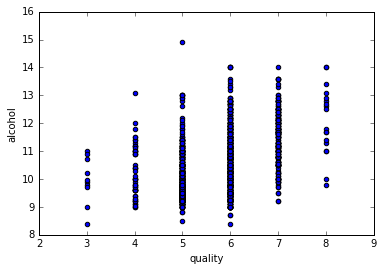

In [237]:
%matplotlib inline
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

We can see that the data is probably better fit for a box plot for a more concise view of the data See if you can figure how to get a boxplot using the pandas documentation and what you have learned so far

Don't worry if you can't quite figure it out just yet, the next section will cover all sorts of data visualizations!